In [5]:
# IMPORTING LIBRARIES 
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
import random

In [6]:
# IMPORT VIDEO 
import datetime
data = cv2.VideoCapture('Untitled design.mp4')
frames = data.get(cv2.CAP_PROP_FRAME_COUNT)
fps = data.get(cv2.CAP_PROP_FPS)
seconds = frames/fps
print(seconds)

25.066666666666666


In [7]:
# initialisation of tracker
cap = cv2.VideoCapture('Untitled design.mp4')
tracker = cv2.TrackerMIL_create()
ret,frame = cap.read()
roi = cv2.selectROI(frame,False)
ret = tracker.init(frame,roi)
(x,y,w,h) = tuple(map(int,roi))

print("x", x,"y", y,"w", w,"h", h)

#function for self guided filter
def self_guided_filter(image, radius, epsilon):
    mean_I = cv2.boxFilter(image, -1, (radius, radius))
    mean_II = cv2.boxFilter(image * image, -1, (radius, radius))
    covariance_I = mean_II - mean_I * mean_I

    a = covariance_I / (covariance_I + epsilon)
    b = mean_I - a * mean_I

    mean_a = cv2.boxFilter(a, -1, (radius, radius))
    mean_b = cv2.boxFilter(b, -1, (radius, radius))

    return mean_a * image + mean_b



#sobel_operator for edges detection 

def sobel_operator(image):
    # Convert the image to grayscale if it's a color image
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Define Sobel kernels
    kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    # Apply convolution to the image with Sobel kernels
    gradient_x = cv2.filter2D(image, cv2.CV_64F, kernel_x)
    gradient_y = cv2.filter2D(image, cv2.CV_64F, kernel_y)

    # Calculate the magnitude of the gradient
    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

    # Normalize the magnitude to the range [0, 255]
    gradient_magnitude = np.uint8(255 * gradient_magnitude / np.max(gradient_magnitude))

    return gradient_magnitude




location = []
track_time = []
c=0
trackallpoint=[]
while cap.isOpened():
    ret, noisy_image = cap.read()
    if ret==True:


       

        # Convert the image to float32 for processing
        noisy_image = noisy_image.astype(np.float32) / 255.0

        # Set parameters for the self-guided filter
        radius = 5
        epsilon = 0.01

        # Apply the self-guided filter for denoising
        denoised_image = self_guided_filter(noisy_image, radius, epsilon)

        # Convert the denoised image back to uint8 for display
        denoised_image = (denoised_image * 255).astype(np.uint8)





        frame_gray = cv2.cvtColor( denoised_image,cv2.COLOR_BGR2GRAY)
        #blur = cv2.blur(frame,(3,3))
        frame_gray = frame_gray[y:y+h,x:x+w]
#       frame_gray = np.asarray(plot_at_k(30,frame_gray),dtype='uint8')
        
        c=c+1
        # Apply Sobel operator
        sobel_result = sobel_operator(frame_gray)
        temp = []
        # Loop iteration corrected
        for i in range(0, h):  # Iterate over the width of the region of interest
            
            for j in range(0, w):  # Iterate over the height of the region of interest
                # Check if the indices are within the bounds of the array
                
                    if sobel_result[i][j] <= 255 and sobel_result[i][j] >= 30:  # Check for edge
                        temp.append((i, j))  # Append the (x, y) coordinates
                        break  # Stop iteration after finding the first edge pixel in the column
        location.append(temp)  # Append the list of edge coordinates
        track_time.append(c / fps)  # Record the time

               
               
            

        # Display the original and Sobel-filtered images


        cv2.imshow("Original Image", frame_gray)
        cv2.imshow('frame',frame)
        cv2.imshow("Sobel Operator Result", sobel_result) 

        time.sleep(1/120)        
        
        t=True
        #trackallpoint.append(temparr)
        if cv2.waitKey(1) & 0XFF == 27  or (cap.isOpened()==False):
            break
    else:
        break
cap.release()
cv2.destroyAllWindows()


x 694 y 203 w 71 h 381


751
751


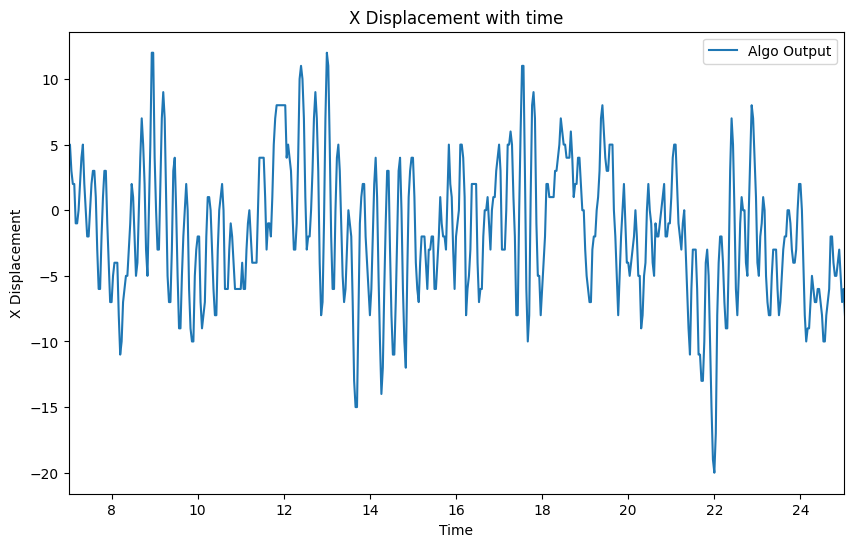

In [10]:

import matplotlib.pyplot as plt

# Assuming location is a list of coordinates or something similar
print(len(location))
print(len(track_time))


mydis = []

for i in range(len(location)):
    cry = location[i][10]
    mydis.append(cry[1])

firstX = mydis[0]

for i in range(len(mydis)):
    mydis[i] = mydis[i] - firstX


#noise data 
tuuo= []

import random

def random_function():
    return random.choice([-1, 0, 1])

# Example usage:
for i in range(len(mydis)):  # Iterating 10 times for demonstration
   if mydis[i] == 0:
      tuuo.append(0)
   else:   
      tuuo.append(mydis[i] + random_function())

plt.figure(figsize=(10, 6))  # Adjust the size as per your requirement
plt.plot(track_time, mydis, label='Algo Output') 
plt.xlim(7,25)
plt.xlabel('Time')  # Add label for x-axis
plt.ylabel('X Displacement')      # Add label for y-axis
plt.title('X Displacement with time')  # Add title to the plot
plt.legend()  # Show legend
plt.show()




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


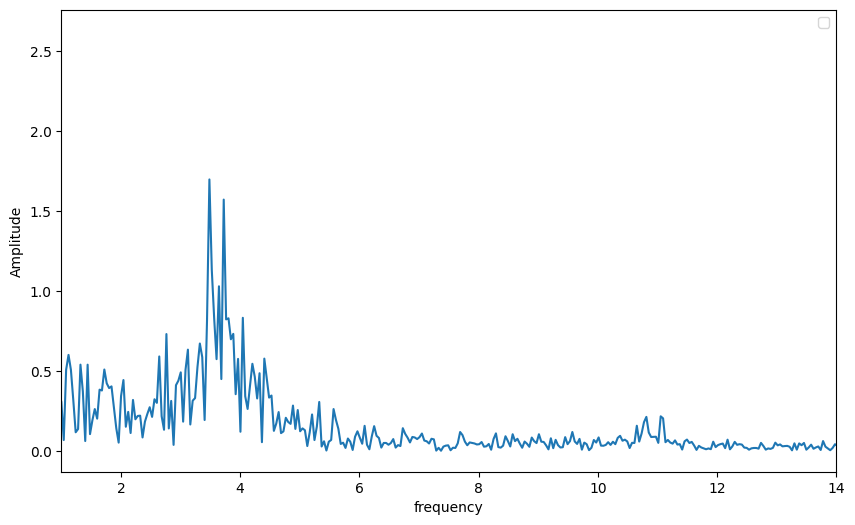

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

# Number of samplepoints
N = len(mydis)
# sample spacing
T = seconds/N
x = np.linspace(0.0, seconds, N)
y = mydis
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)


plt.figure(figsize=(10, 6))
plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))

plt.xlim(1,14)
plt.ylabel('Amplitude')
plt.xlabel('frequency')
plt.legend()  # Show legend
plt.show()